# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("dark_background")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

#### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv("appl_1980_2014.csv")

### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [6]:
apple.set_index("Date", inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [7]:
len(apple[apple.duplicated(keep=False)])

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_index(inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [9]:
apple["EndMonth"] = apple.index + MonthEnd(1)
apple.groupby("EndMonth").last().head()

,Open,High,Low,Close,Volume,Adj Close
EndMonth,,,,,,
1980-12-31,35.25,35.25,35.12,35.12,17220000,0.55
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,25.00,24.75,24.75,2475200,0.39
1981-04-30,28.00,28.00,27.88,27.88,3410400,0.43


### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
(apple.index[-1] - apple.index[0]).days

12261

### Step 11.  How many months in the data we have?

In [11]:
((apple.index[-1] - apple.index[0])/30).days

408

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

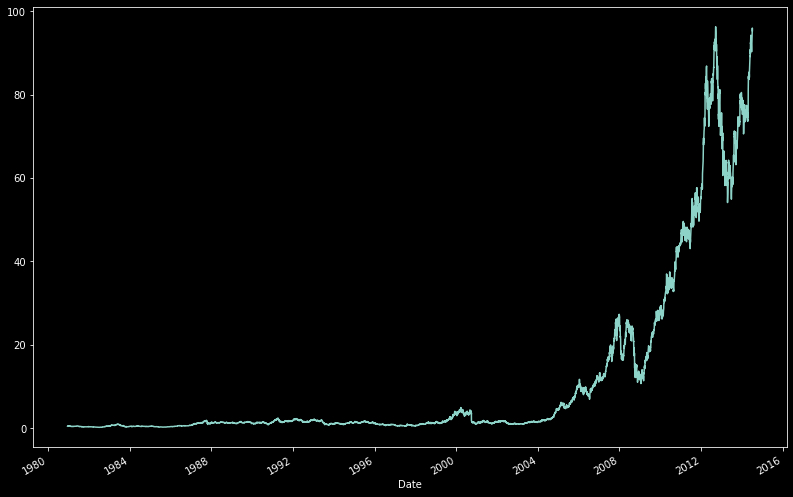

In [12]:
plt.figure(figsize=(13.5, 9))
_ = apple["Adj Close"].plot()

### What is the highest `Adj Close` to date?

In [13]:
apple["Adj Close"].idxmax()

Timestamp('2012-09-19 00:00:00')